<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

Data Science Cohort Live NYC October 2023
<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [2]:
from tensorflow import keras

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

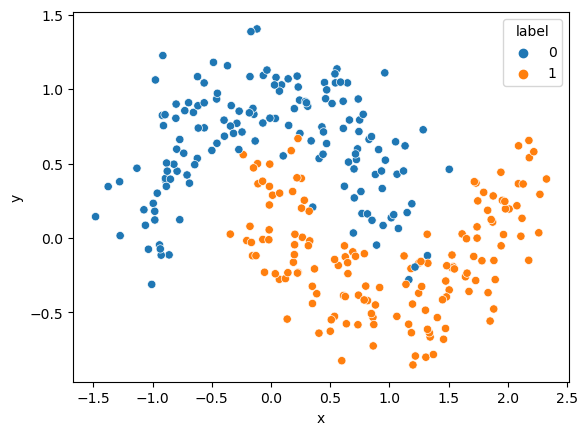

In [3]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [4]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [5]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid'))

Metal device set to: Apple M2


2023-10-17 10:57:05.299787: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-17 10:57:05.300054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [8]:
from tensorflow.keras.optimizers import Adam

In [9]:
opt = Adam(learning_rate = 0.01) # typical parameter

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each forward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of the training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience)
- Terminate training

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [14]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/10000


2023-10-17 10:57:06.124320: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-17 10:57:06.274900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 2s 54ms/step - loss: 0.6460 - accuracy: 0.6927 - auc: 0.8825 - val_loss: 0.6282 - val_accuracy: 0.7292 - val_auc: 0.9062
Epoch 2/10000
1/6 [====>.........................] - ETA: 0s - loss: 0.6217 - accuracy: 0.8438 - auc: 0.9706

2023-10-17 10:57:08.366909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 12ms/step - loss: 0.6253 - accuracy: 0.7760 - auc: 0.9078 - val_loss: 0.6094 - val_accuracy: 0.7500 - val_auc: 0.9232
Epoch 3/10000
6/6 [==============================] - 0s 11ms/step - loss: 0.6051 - accuracy: 0.8125 - auc: 0.9256 - val_loss: 0.5926 - val_accuracy: 0.7708 - val_auc: 0.9295
Epoch 4/10000
6/6 [==============================] - 0s 11ms/step - loss: 0.5861 - accuracy: 0.8229 - auc: 0.9299 - val_loss: 0.5763 - val_accuracy: 0.7708 - val_auc: 0.9286
Epoch 5/10000
6/6 [==============================] - 0s 11ms/step - loss: 0.5690 - accuracy: 0.8281 - auc: 0.9330 - val_loss: 0.5608 - val_accuracy: 0.7708 - val_auc: 0.9295
Epoch 6/10000
6/6 [==============================] - 0s 11ms/step - loss: 0.5531 - accuracy: 0.8281 - auc: 0.9318 - val_loss: 0.5456 - val_accuracy: 0.7708 - val_auc: 0.9312
Epoch 7/10000
6/6 [==============================] - 0s 11ms/step - loss: 0.5371 - accuracy: 0.8281 - auc: 0.9338 - val_loss: 0.5318 - val_accur

6/6 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.8802 - auc: 0.9540 - val_loss: 0.2777 - val_accuracy: 0.8750 - val_auc: 0.9705
Epoch 96/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.8802 - auc: 0.9541 - val_loss: 0.2781 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 97/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2867 - accuracy: 0.8750 - auc: 0.9541 - val_loss: 0.2767 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 98/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2861 - accuracy: 0.8750 - auc: 0.9542 - val_loss: 0.2766 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 99/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2858 - accuracy: 0.8750 - auc: 0.9544 - val_loss: 0.2756 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 100/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2856 - accuracy: 0.8750 - auc: 0.9544 - val_loss: 0.2742 - val_accur

Epoch 142/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2758 - accuracy: 0.8750 - auc: 0.9551 - val_loss: 0.2523 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 143/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2756 - accuracy: 0.8750 - auc: 0.9551 - val_loss: 0.2519 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 144/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2755 - accuracy: 0.8750 - auc: 0.9553 - val_loss: 0.2515 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 145/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.8698 - auc: 0.9550 - val_loss: 0.2501 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 146/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2753 - accuracy: 0.8750 - auc: 0.9551 - val_loss: 0.2506 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 147/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2750 - accuracy: 0.8750 - auc: 0.9552 - val_loss

Epoch 189/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.8698 - auc: 0.9591 - val_loss: 0.2261 - val_accuracy: 0.9167 - val_auc: 0.9813
Epoch 190/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.8698 - auc: 0.9591 - val_loss: 0.2256 - val_accuracy: 0.9167 - val_auc: 0.9813
Epoch 191/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2623 - accuracy: 0.8698 - auc: 0.9591 - val_loss: 0.2251 - val_accuracy: 0.9167 - val_auc: 0.9821
Epoch 192/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.8698 - auc: 0.9594 - val_loss: 0.2247 - val_accuracy: 0.9167 - val_auc: 0.9821
Epoch 193/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2616 - accuracy: 0.8698 - auc: 0.9595 - val_loss: 0.2243 - val_accuracy: 0.9167 - val_auc: 0.9821
Epoch 194/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.8698 - auc: 0.9595 - val_loss

Epoch 236/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2467 - accuracy: 0.8802 - auc: 0.9639 - val_loss: 0.2070 - val_accuracy: 0.9375 - val_auc: 0.9839
Epoch 237/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.8750 - auc: 0.9636 - val_loss: 0.2055 - val_accuracy: 0.9375 - val_auc: 0.9839
Epoch 238/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.8750 - auc: 0.9643 - val_loss: 0.2058 - val_accuracy: 0.9375 - val_auc: 0.9839
Epoch 239/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.8750 - auc: 0.9643 - val_loss: 0.2054 - val_accuracy: 0.9375 - val_auc: 0.9839
Epoch 240/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.8750 - auc: 0.9642 - val_loss: 0.2064 - val_accuracy: 0.9375 - val_auc: 0.9839
Epoch 241/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.8802 - auc: 0.9646 - val_loss

Epoch 283/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2306 - accuracy: 0.8854 - auc: 0.9675 - val_loss: 0.1907 - val_accuracy: 0.9583 - val_auc: 0.9839
Epoch 284/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 0.8854 - auc: 0.9675 - val_loss: 0.1893 - val_accuracy: 0.9583 - val_auc: 0.9839
Epoch 285/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2298 - accuracy: 0.8854 - auc: 0.9678 - val_loss: 0.1895 - val_accuracy: 0.9583 - val_auc: 0.9839
Epoch 286/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2298 - accuracy: 0.8854 - auc: 0.9678 - val_loss: 0.1884 - val_accuracy: 0.9583 - val_auc: 0.9839
Epoch 287/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2292 - accuracy: 0.8854 - auc: 0.9680 - val_loss: 0.1887 - val_accuracy: 0.9583 - val_auc: 0.9839
Epoch 288/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2287 - accuracy: 0.8854 - auc: 0.9681 - val_loss

Epoch 330/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2131 - accuracy: 0.8958 - auc: 0.9725 - val_loss: 0.1753 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 331/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2126 - accuracy: 0.8958 - auc: 0.9727 - val_loss: 0.1751 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 332/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2123 - accuracy: 0.8958 - auc: 0.9727 - val_loss: 0.1742 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 333/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.2119 - accuracy: 0.8958 - auc: 0.9728 - val_loss: 0.1742 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 334/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2115 - accuracy: 0.8958 - auc: 0.9728 - val_loss: 0.1738 - val_accuracy: 0.9583 - val_auc: 0.9893
Epoch 335/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.2110 - accuracy: 0.8958 - auc: 0.9730 - val_loss

Epoch 377/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1954 - accuracy: 0.9010 - auc: 0.9775 - val_loss: 0.1591 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 378/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1951 - accuracy: 0.9010 - auc: 0.9776 - val_loss: 0.1590 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 379/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1948 - accuracy: 0.9062 - auc: 0.9777 - val_loss: 0.1593 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 380/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1943 - accuracy: 0.9062 - auc: 0.9779 - val_loss: 0.1592 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 381/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1939 - accuracy: 0.9062 - auc: 0.9779 - val_loss: 0.1582 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 382/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1936 - accuracy: 0.9010 - auc: 0.9780 - val_loss

Epoch 424/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1786 - accuracy: 0.9219 - auc: 0.9815 - val_loss: 0.1471 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 425/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1780 - accuracy: 0.9271 - auc: 0.9816 - val_loss: 0.1467 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 426/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1778 - accuracy: 0.9271 - auc: 0.9815 - val_loss: 0.1468 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 427/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9271 - auc: 0.9819 - val_loss: 0.1460 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 428/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1770 - accuracy: 0.9271 - auc: 0.9819 - val_loss: 0.1461 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 429/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1766 - accuracy: 0.9271 - auc: 0.9823 - val_loss

Epoch 471/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.9323 - auc: 0.9858 - val_loss: 0.1363 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 472/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1619 - accuracy: 0.9323 - auc: 0.9860 - val_loss: 0.1365 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 473/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1616 - accuracy: 0.9375 - auc: 0.9864 - val_loss: 0.1367 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 474/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1616 - accuracy: 0.9323 - auc: 0.9863 - val_loss: 0.1357 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 475/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1608 - accuracy: 0.9375 - auc: 0.9865 - val_loss: 0.1359 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 476/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1606 - accuracy: 0.9375 - auc: 0.9867 - val_loss

Epoch 518/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1475 - accuracy: 0.9583 - auc: 0.9903 - val_loss: 0.1283 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 519/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1472 - accuracy: 0.9583 - auc: 0.9903 - val_loss: 0.1280 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 520/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9583 - auc: 0.9903 - val_loss: 0.1280 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 521/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1467 - accuracy: 0.9583 - auc: 0.9903 - val_loss: 0.1280 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 522/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1464 - accuracy: 0.9583 - auc: 0.9905 - val_loss: 0.1278 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 523/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1461 - accuracy: 0.9583 - auc: 0.9903 - val_loss

Epoch 565/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1348 - accuracy: 0.9583 - auc: 0.9914 - val_loss: 0.1227 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 566/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1347 - accuracy: 0.9583 - auc: 0.9915 - val_loss: 0.1228 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 567/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1342 - accuracy: 0.9583 - auc: 0.9915 - val_loss: 0.1224 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 568/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1341 - accuracy: 0.9583 - auc: 0.9914 - val_loss: 0.1220 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 569/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1339 - accuracy: 0.9583 - auc: 0.9914 - val_loss: 0.1213 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 570/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1335 - accuracy: 0.9583 - auc: 0.9915 - val_loss

Epoch 612/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1238 - accuracy: 0.9688 - auc: 0.9928 - val_loss: 0.1166 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 613/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1235 - accuracy: 0.9688 - auc: 0.9929 - val_loss: 0.1169 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 614/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1232 - accuracy: 0.9688 - auc: 0.9929 - val_loss: 0.1167 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 615/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1233 - accuracy: 0.9688 - auc: 0.9929 - val_loss: 0.1173 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 616/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1229 - accuracy: 0.9688 - auc: 0.9930 - val_loss: 0.1170 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 617/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1225 - accuracy: 0.9688 - auc: 0.9930 - val_loss

Epoch 659/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9688 - auc: 0.9932 - val_loss: 0.1135 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 660/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1143 - accuracy: 0.9688 - auc: 0.9935 - val_loss: 0.1126 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 661/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.9688 - auc: 0.9937 - val_loss: 0.1126 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 662/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1139 - accuracy: 0.9688 - auc: 0.9938 - val_loss: 0.1123 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 663/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1137 - accuracy: 0.9688 - auc: 0.9939 - val_loss: 0.1125 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 664/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1134 - accuracy: 0.9688 - auc: 0.9939 - val_loss

Epoch 706/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1066 - accuracy: 0.9688 - auc: 0.9950 - val_loss: 0.1095 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 707/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1065 - accuracy: 0.9688 - auc: 0.9950 - val_loss: 0.1094 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 708/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1063 - accuracy: 0.9688 - auc: 0.9951 - val_loss: 0.1091 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 709/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1061 - accuracy: 0.9688 - auc: 0.9953 - val_loss: 0.1090 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 710/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1061 - accuracy: 0.9688 - auc: 0.9949 - val_loss: 0.1094 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 711/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1058 - accuracy: 0.9688 - auc: 0.9950 - val_loss

Epoch 753/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.1000 - accuracy: 0.9688 - auc: 0.9957 - val_loss: 0.1072 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 754/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0999 - accuracy: 0.9688 - auc: 0.9958 - val_loss: 0.1066 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 755/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0997 - accuracy: 0.9688 - auc: 0.9959 - val_loss: 0.1064 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 756/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0996 - accuracy: 0.9688 - auc: 0.9959 - val_loss: 0.1063 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 757/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0996 - accuracy: 0.9688 - auc: 0.9959 - val_loss: 0.1065 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 758/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.9688 - auc: 0.9957 - val_loss

Epoch 800/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9688 - auc: 0.9965 - val_loss: 0.1049 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 801/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.9688 - auc: 0.9965 - val_loss: 0.1051 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 802/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9688 - auc: 0.9963 - val_loss: 0.1043 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 803/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0941 - accuracy: 0.9688 - auc: 0.9964 - val_loss: 0.1046 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 804/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0940 - accuracy: 0.9688 - auc: 0.9964 - val_loss: 0.1045 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 805/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0941 - accuracy: 0.9688 - auc: 0.9964 - val_loss

Epoch 847/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0896 - accuracy: 0.9688 - auc: 0.9967 - val_loss: 0.1026 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 848/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.9688 - auc: 0.9966 - val_loss: 0.1031 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 849/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0895 - accuracy: 0.9688 - auc: 0.9968 - val_loss: 0.1029 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 850/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0894 - accuracy: 0.9688 - auc: 0.9968 - val_loss: 0.1031 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 851/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0892 - accuracy: 0.9740 - auc: 0.9967 - val_loss: 0.1025 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 852/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0891 - accuracy: 0.9740 - auc: 0.9968 - val_loss

Epoch 894/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0853 - accuracy: 0.9740 - auc: 0.9973 - val_loss: 0.1016 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 895/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9740 - auc: 0.9973 - val_loss: 0.1015 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 896/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0852 - accuracy: 0.9740 - auc: 0.9973 - val_loss: 0.1017 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 897/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 0.9740 - auc: 0.9973 - val_loss: 0.1017 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 898/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 0.9740 - auc: 0.9972 - val_loss: 0.1012 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 899/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0849 - accuracy: 0.9740 - auc: 0.9973 - val_loss

Epoch 941/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0820 - accuracy: 0.9740 - auc: 0.9974 - val_loss: 0.1012 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 942/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0819 - accuracy: 0.9740 - auc: 0.9974 - val_loss: 0.1008 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 943/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.9740 - auc: 0.9974 - val_loss: 0.1009 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 944/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.9740 - auc: 0.9974 - val_loss: 0.1010 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 945/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0816 - accuracy: 0.9740 - auc: 0.9975 - val_loss: 0.1013 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 946/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0816 - accuracy: 0.9740 - auc: 0.9974 - val_loss

Epoch 988/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0790 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.1011 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 989/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1010 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 990/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.1008 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 991/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.1013 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 992/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0790 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1018 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 993/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0786 - accuracy: 0.9688 - auc: 0.9975 - val_loss

6/6 [==============================] - 0s 6ms/step - loss: 0.0764 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1019 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1035/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0764 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1022 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1036/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1022 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1037/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0765 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1022 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1038/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0764 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1020 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1039/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.0767 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.1026 - 

Epoch 1081/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0745 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.1023 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1082/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1014 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1083/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0740 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1015 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1084/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1014 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1085/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1016 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1086/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9688 - auc: 0.9977 - va

6/6 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1031 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1128/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1026 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1129/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0723 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1029 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1130/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1035 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1131/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0723 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1031 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1132/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0722 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1027 - 

Epoch 1174/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0707 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1036 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1175/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0706 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1038 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1176/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0706 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1036 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1177/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1037 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1178/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1041 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1179/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9688 - auc: 0.9978 - va

6/6 [==============================] - 0s 4ms/step - loss: 0.0693 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1042 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1221/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0692 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1044 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1222/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1042 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1223/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1041 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1224/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1037 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1225/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0690 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1042 - 

Epoch 1267/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0678 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1048 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1268/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1051 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1269/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1047 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1270/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0678 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1048 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1271/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.1043 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1272/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0678 - accuracy: 0.9688 - auc: 0.9978 - va

6/6 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.1054 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1314/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.1056 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1315/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.1059 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1316/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.1060 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1317/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.1063 - val_accuracy: 0.9375 - val_auc: 0.9929
Epoch 1318/10000
6/6 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.1065 - 

In [15]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

2/2 [==============================] - 0s 9ms/step


2023-10-17 10:58:15.706971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[9.9956793e-01],
       [9.9249166e-01],
       [9.6604198e-01],
       [9.9480838e-01],
       [2.4401263e-07]], dtype=float32)

In [16]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [17]:
# returns loss + results of metrics used
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy, test_AUC)

0.9666666388511658 0.9988775849342346


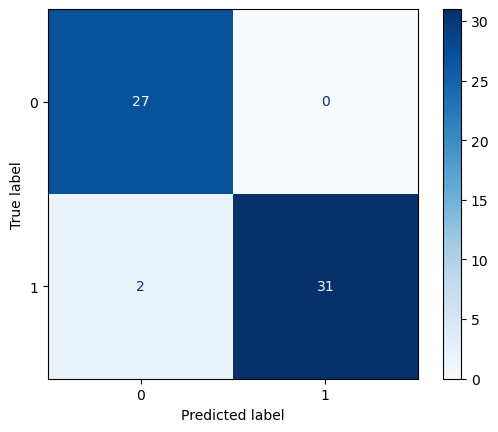

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

80/80 [==============================] - 0s 2ms/step


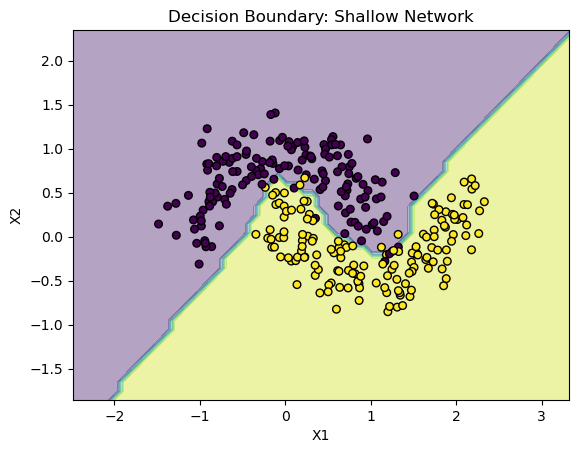

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [20]:
train_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.645958,0.692708,0.882459,0.628223,0.729167,0.906250
1,0.625328,0.776042,0.907822,0.609418,0.750000,0.923214
2,0.605071,0.812500,0.925603,0.592607,0.770833,0.929464
3,0.586141,0.822917,0.929912,0.576349,0.770833,0.928571
4,0.569047,0.828125,0.933021,0.560776,0.770833,0.929464


Plotting history:

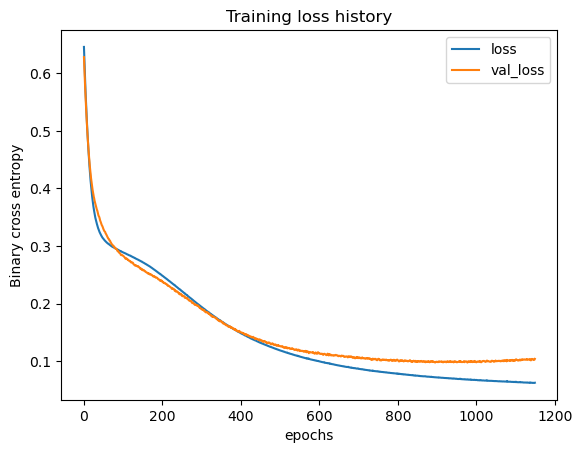

In [21]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

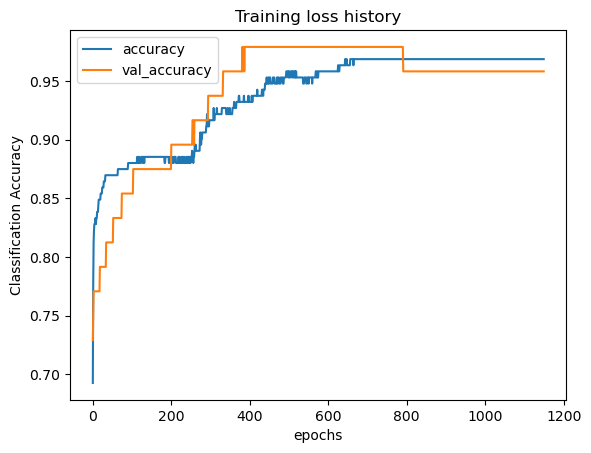

In [22]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [23]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [24]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


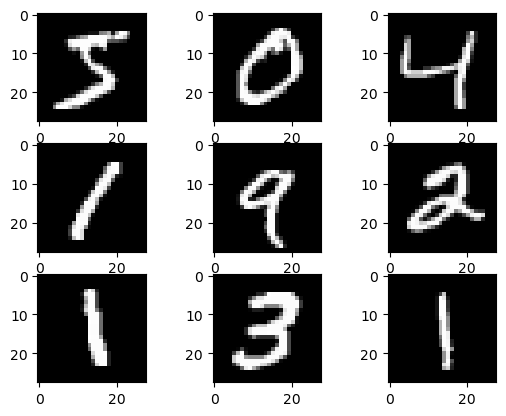

In [25]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [26]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [27]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [28]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [29]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [30]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100


2023-10-17 10:58:19.093330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1494/1500 [============================>.] - ETA: 0s - loss: 0.4750 - accuracy: 0.8624

2023-10-17 10:58:28.755196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 11s 7ms/step - loss: 0.4740 - accuracy: 0.8626 - val_loss: 0.2398 - val_accuracy: 0.9293
Epoch 2/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2213 - accuracy: 0.9361 - val_loss: 0.2038 - val_accuracy: 0.9392
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1754 - accuracy: 0.9483 - val_loss: 0.1671 - val_accuracy: 0.9503
Epoch 4/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1497 - accuracy: 0.9546 - val_loss: 0.1624 - val_accuracy: 0.9517
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1303 - accuracy: 0.9604 - val_loss: 0.1452 - val_accuracy: 0.9568
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1158 - accuracy: 0.9652 - val_loss: 0.1573 - val_accuracy: 0.9541
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1049 - accuracy: 0.9679 - val_loss: 0.1453 - val_accurac

In [31]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

128/313 [===========>..................] - ETA: 0s

2023-10-17 11:10:31.991425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


array([[2.93434596e-15, 5.26608752e-14, 2.02711493e-11, ...,
        1.00000000e+00, 4.22555701e-14, 1.65862418e-16],
       [8.82705528e-16, 1.66323704e-12, 1.00000000e+00, ...,
        2.00607255e-29, 9.70996639e-27, 5.64588353e-37],
       [1.70860081e-14, 9.99999404e-01, 5.20565209e-08, ...,
        7.48799422e-08, 4.34469086e-07, 6.71572666e-16],
       ...,
       [1.86071281e-31, 7.03200004e-20, 1.78232535e-30, ...,
        4.41284057e-25, 1.13093526e-26, 6.06800582e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.07460351e-32, 1.05205381e-35],
       [9.58183646e-21, 3.98826120e-35, 6.09717422e-33, ...,
        0.00000000e+00, 1.15308760e-25, 7.25871509e-33]], dtype=float32)

In [32]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

2023-10-17 11:10:32.578247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.3410484492778778, 0.9593999981880188]

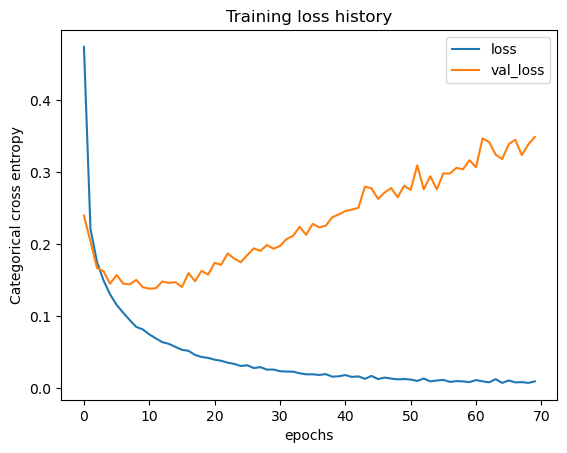

In [33]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

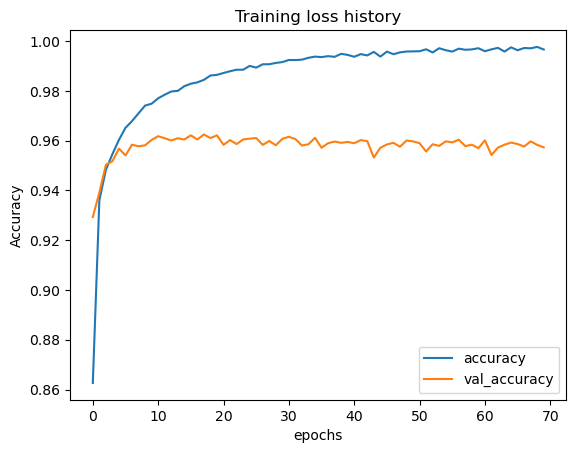

In [34]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [35]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6])

Let's look at our classifier did on the test set in more detail.

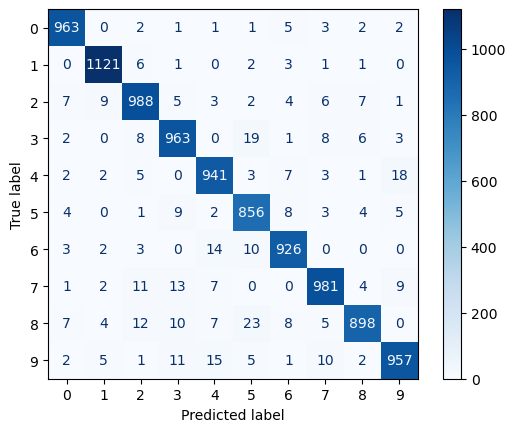

In [36]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>